In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv(path_to_csv + "/SONY.csv")

In [5]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [22]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [23]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[132.56817096 132.6387567  132.70934243 132.77992817 132.8505139
 132.92109964 132.99168538 133.06227111 133.13285685 133.20344259
 133.27402832 133.34461406 133.41519979 133.48578553 133.55637127
 133.626957   133.69754274 133.76812848 133.83871421 133.90929995
 133.97988569 134.05047142 134.12105716 134.19164289 134.26222863
 134.33281437 134.4034001  134.47398584 134.54457158 134.61515731]


In [25]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [26]:
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Testing RMSE:', test_rmse)

Testing RMSE: 39.52272890623631


In [27]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_pred , y_test)
print("Testing MAE: {}".format(test_mae))

Testing MAE: 38.019299840281086


In [28]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Testing MAPE: ", test_mape)

Testing MAPE:  0.49783187320226924


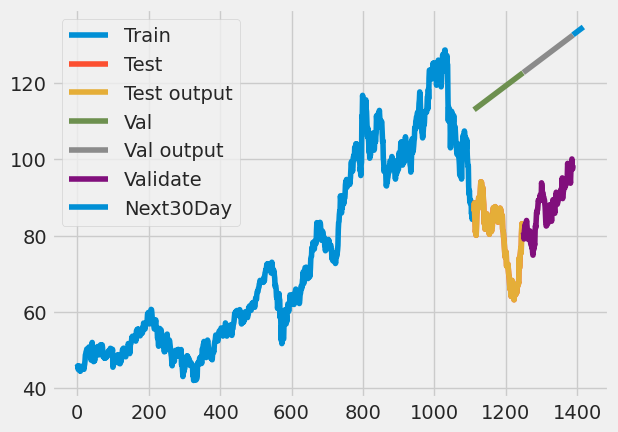

In [29]:
plt.plot(train_data.index, train_data['Close'])

plt.plot(test_data.index, test_data['Close'])

plt.plot(test_data.index, y_test)

plt.plot(test_data.index, y_pred)

plt.plot(val_data.index, y_pred_val)

plt.plot(val_data.index, y_val)

plt.plot(last_data,y_next_30_days)

plt.legend(['Train', 'Test', 'Test output',  'Val', 'Val output','Validate','Next30Day'])
plt.show()